***I. IMPORT DATA AND PREPARATION***

In [282]:
import pandas as pd

In [283]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ne_chunk

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


In [284]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [285]:
import re

In [286]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: torch in c:\users\buith\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages (2.0.0)




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\buith\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [287]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\buith\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [288]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\buith\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [289]:
import wordcloud

In [290]:
disease=pd.read_csv('Disease.csv')

In [291]:
disease

,Topic
0,precaution prevent disease catastrophe january
1,united nation garbage near house prevent disease
2,info disease spread
3,departement theres medecine sickness disease
4,necessary regard disease
...,...
280,broad healthy mobile build mobile technology h...
281,families flee makeshift camp force scavenge sc...
282,polio viral disease attack nervous lead irreve...
283,cadmium metallic element widely battery liver ...


In [292]:
df_train=pd.read_csv("disaster_response_messages_training.csv")

C:\Users\buith\AppData\Local\Temp\ipykernel_16704\4141220936.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv("disaster_response_messages_training.csv")


In [293]:
df_test=pd.read_csv("disaster_response_messages_test.csv")

In [294]:
df_valid=pd.read_csv("disaster_response_messages_validation.csv")

In [295]:
df_train.drop(['original'],axis=1,inplace=True)
df_test.drop(['original'],axis=1,inplace=True)
df_valid.drop(['original'],axis=1,inplace=True)

In [296]:
df_train=df_train.applymap(str)
df_valid=df_valid.applymap(str)
df_test=df_test.applymap(str)

In [297]:
def join_words(words_list):
    return ' '.join(words_list)

In [298]:
#Set up stop words for removal
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

nltk.download('stopwords')
from nltk.corpus import stopwords
#stopwords
stop_words=stopwords.words("english")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\buith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\buith\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\buith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [299]:
list_of_stop_words=["the", "has", "it", "with", "were", "can", "of","to","on", "this", "about", "that","was", "also", "http", "are","is", "am","some", "about","a", "an", "which", "what", "how", "when", "who","this","that","are", "the", "to", "we", "have", "in", "you", "with", "of", "what", "be", "as", "has", "from", "by", "that", "am","people","know","dont","also","would","people","please","like","would","People","Know","need","Need","Also","Like","Would","Dont","take","make","tell","well","many","Many","want","Want","cause","still","since","give","year","include","problem","place","region","number","find","provide","come","can","could","may","might","area","affect","world","person","part","thank","thanks","haiti", "information", "good", "anything", "nothing", "time","help","country","report","can","cant","cannot","can not","along","didnt","never","anymore",'havent',"without","others","natural","response","disaster","sandy","food","continue","something","even","already","continue",'disaster',"much","last","year","month","week","already", "important", "concern", "morning", "haitian", "system", "leave", "friend", "mother", "back","lose","portauprince","assisstance","relief","risk","management","support","stay","livelihood","temporary","support","send","someone","somebody","portauprince","flood","water","hurricane","earthquake","storm","bitly","rain","never","anymore","without","sandy","food","response","something","even","didnt","much","especially","last","week","year","month","sent","send","receive","daily","inside","concern","already","temporary","government","message",'nothern','central','local','start','severly','bring','india','district','province','flooding','official','santiago',"will","help","need","cross","people","thank","still","said","last","help","people","u","will","information","several","anything","find","thank","want","area","said","including","assisstance","need","team","work","live","lives","note","notes",'from','to','as','of','are','such','and','from','to','are','with','include','including','among','general','though','as','of','which','are','or','with','though','namely','also','a','an','against','disease','avoid','increase','outbreak','health']
list_of_stop_words = list(set(list_of_stop_words))
stop_words.extend(list_of_stop_words)

In [300]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())
    x = re.sub(r'\b\w{1,3}\b',' ',x)
    x = re.sub(r'\d+',' ', x)
    stop_words = list(stopwords.words('english'))
    stop_words.extend(list_of_stop_words)
    x = [w for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [301]:
#mapping pos tags
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [302]:
#lemmatizing 
import string

def clean_text(text):
    text = [word.strip(string.punctuation) for word in text.split()]
    pos_tags = pos_tag(text)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = " ".join(text)
    return(text)

In [303]:
df_train=df_train.applymap(str)
df_test=df_test.applymap(str)
df_valid=df_valid.applymap(str)

In [304]:
disease['Topic']=disease['Topic'].apply(clean_text)
disease['Topic']=disease['Topic'].apply(preprocess)

In [305]:
df_train['message_cleaned']=df_train['message'].apply(clean_text)
df_test['message_cleaned']=df_test['message'].apply(clean_text)
df_valid['message_cleaned']=df_valid['message'].apply(clean_text)

df_train['message_cleaned']=df_train['message_cleaned'].apply(preprocess)
df_test['message_cleaned']=df_test['message_cleaned'].apply(preprocess)
df_valid['message_cleaned']=df_valid['message_cleaned'].apply(preprocess)

In [306]:
# df_train['message_cleaned_2']=df_train['message'].copy()
# df_test['message_cleaned_2']=df_test['message'].copy()
# df_valid['message_cleaned_2']=df_valid['message'].copy()


In [307]:
frames=[df_train,df_test,df_valid]
df=pd.concat(frames)
df=pd.DataFrame(df.reset_index(drop=True))

II. FEATURE EXTRACTION

2.1 BAG-OR-WORDS

In [308]:
# Create a CountVectorizer object and fit it on the "message" column of the train dataframe
vectorizer_train = CountVectorizer()
train_bow = vectorizer_train.fit_transform(df_train['message_cleaned'])

# Create a CountVectorizer object and fit it on the "message" column of the test dataframe
vectorizer_test = CountVectorizer()
test_bow = vectorizer_test.fit_transform(df_test['message_cleaned'])

# Create a CountVectorizer object and fit it on the "message" column of the valid dataframe
vectorizer_valid = CountVectorizer()
valid_bow = vectorizer_valid.fit_transform(df_valid['message_cleaned'])

# Create a CountVectorizer object and fit it on the "message" column of the dataframe
vectorizer_df = CountVectorizer()
df_bow = vectorizer_df.fit_transform(df['message_cleaned'])

In [309]:
# Create a dictionary of word frequencies from the BoW matrix for train
bow_dict_train = dict(zip(vectorizer_train.get_feature_names_out(), train_bow.sum(axis=0).tolist()[0]))
# Create a dictionary of word frequencies from the BoW matrix for test
bow_dict_test = dict(zip(vectorizer_test.get_feature_names_out(), test_bow.sum(axis=0).tolist()[0]))

# Create a dictionary of word frequencies from the BoW matrix for valid
bow_dict_valid = dict(zip(vectorizer_valid.get_feature_names_out(), valid_bow.sum(axis=0).tolist()[0]))

# Create a dictionary of word frequencies from the BoW matrix for df
bow_dict_df = dict(zip(vectorizer_df.get_feature_names_out(), df_bow.sum(axis=0).tolist()[0]))

2.2 Word Cloud

In [310]:
# Import wordcloud
from wordcloud import WordCloud

In [311]:
import matplotlib.pyplot as plt

In [312]:
# Create a word cloud
wordcloud_train = WordCloud(background_color="white").generate_from_frequencies(bow_dict_train)
wordcloud_test = WordCloud(background_color="white").generate_from_frequencies(bow_dict_test)
wordcloud_valid = WordCloud(background_color="white").generate_from_frequencies(bow_dict_valid)
wordcloud_df = WordCloud(background_color="white").generate_from_frequencies(bow_dict_df)

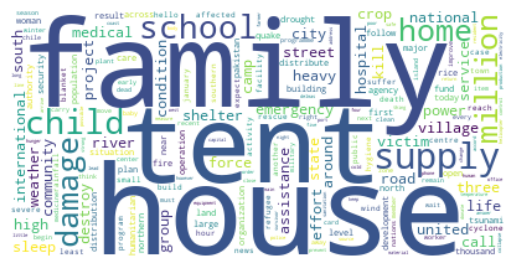

None

In [313]:
# Train word_cloud
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis("off")
display(plt.show())

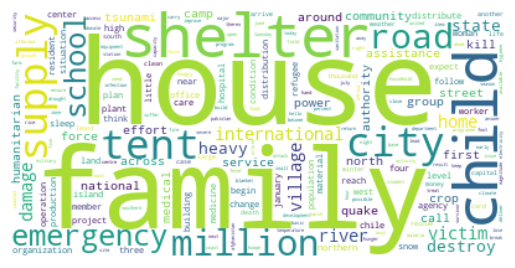

In [314]:
# Test word_cloud
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
plt.show()

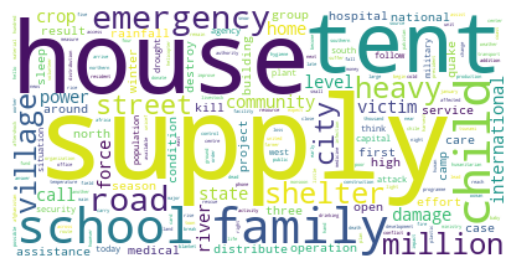

In [315]:
# Valid word_cloud
plt.imshow(wordcloud_valid, interpolation='bilinear')
plt.axis("off")
plt.show()

2.3 TF-IDF

In [316]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# Create a TfidfVectorizer object and fit it on the "message" column of the dataframe
tfidf_df_test = TfidfVectorizer(max_features=30)
tfidf_df_test_matrix = tfidf_df_test.fit_transform(df_test['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_test_matrix=pd.DataFrame(tfidf_df_test_matrix.toarray(), columns=tfidf_df_test.get_feature_names_out())
tfidf_df_test_matrix.fillna(value="", inplace=True)

In [317]:
# Create a TfidfVectorizer object and fit it on the "message" column of the dataframe
tfidf_df_train = TfidfVectorizer(max_features=30)
tfidf_df_train_matrix = tfidf_df_train.fit_transform(df_train['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_train_matrix=pd.DataFrame(tfidf_df_train_matrix.toarray(), columns=tfidf_df_train.get_feature_names_out())
tfidf_df_train_matrix.fillna(value="", inplace=True)

In [318]:
# Create a TfidfVectorizer object and fit it on the "message" column of the dataframe
tfidf_df_valid = TfidfVectorizer(max_features=30)
tfidf_df_valid_matrix = tfidf_df_valid.fit_transform(df_valid['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_valid_matrix=pd.DataFrame(tfidf_df_valid_matrix.toarray(), columns=tfidf_df_valid.get_feature_names_out())
tfidf_df_valid_matrix.fillna(value="", inplace=True)

In [319]:
# Create a TfidfVectorizer object and fit it on the "message" column of the dataframe
tfidf_df = TfidfVectorizer(max_features=30)
tfidf_df_matrix = tfidf_df.fit_transform(df['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_matrix=pd.DataFrame(tfidf_df_matrix.toarray(), columns=tfidf_df.get_feature_names_out())
tfidf_df_matrix.fillna(value="", inplace=True)

In [320]:
tfidf_df_test_matrix.head()

,assistance,child,city,community,crop,damage,destroy,emergency,family,force,...,road,school,service,shelter,state,street,supply,tent,victim,village
0,0.0,0.0,0.0,0.0,0.0,0.0,0.726128,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.687559,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [321]:
tfidf_df_train_matrix.head()

,assistance,call,child,city,community,crop,damage,destroy,emergency,family,...,river,road,school,shelter,state,supply,tent,three,victim,village
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [322]:
tfidf_df_valid_matrix.head()

,call,child,city,community,crop,damage,emergency,family,force,heavy,...,river,road,school,shelter,state,street,supply,tent,victim,village
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [323]:
tfidf_df_matrix.head()

,assistance,call,child,city,community,crop,damage,destroy,emergency,family,...,river,road,school,shelter,state,street,supply,tent,victim,village
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [324]:
feature_df_names=list(tfidf_df.get_feature_names_out())
feature_train_names=list(tfidf_df_train.get_feature_names_out())
feature_test_names=list(tfidf_df_test.get_feature_names_out())
feature_valid_names=list(tfidf_df_valid.get_feature_names_out())

In [325]:
disease

,Topic
0,precaution prevent catastrophe january
1,united nation garbage near house prevent
2,info spread
3,departement medecine sickness
4,necessary regard
...,...
280,broad healthy mobile build mobile technology p...
281,family flee makeshift camp force scavenge scar...
282,polio viral attack nervous lead irreversible p...
283,cadmium metallic element widely battery liver ...


In [326]:
disease['Topic']=disease['Topic'].apply(clean_text)
disease['Topic']=disease['Topic'].apply(preprocess)

In [327]:
disease

,Topic
0,precaution prevent catastrophe january
1,united nation garbage near house prevent
2,info spread
3,departement medecine sickness
4,necessary regard
...,...
280,broad healthy mobile build mobile technology p...
281,family flee makeshift camp force scavenge scar...
282,polio viral attack nervous lead irreversible p...
283,cadmium metallic element widely battery liver ...


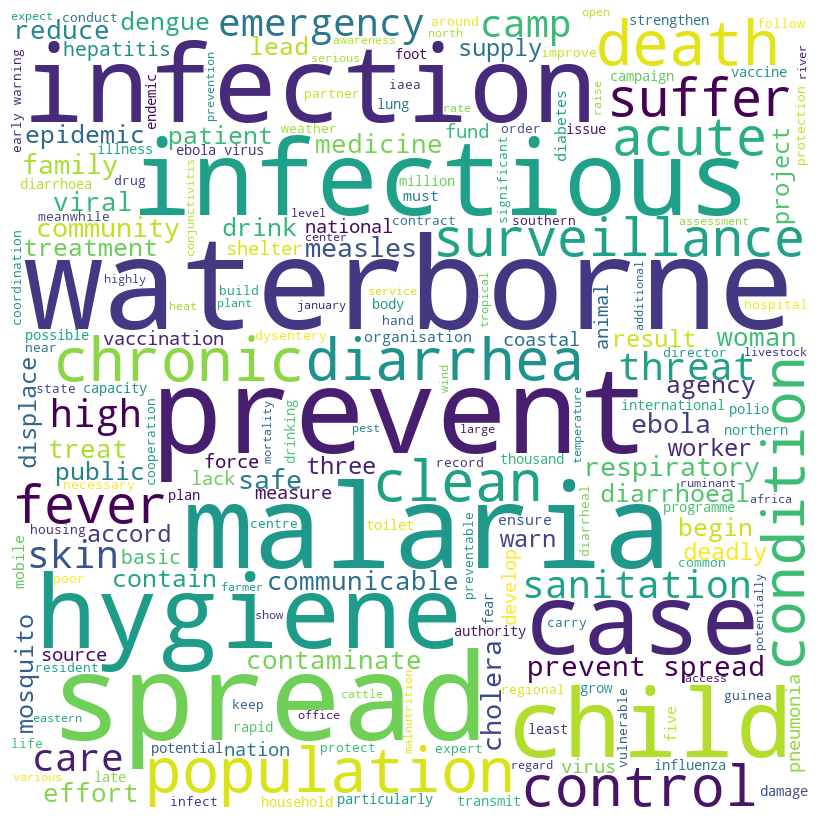

In [328]:
from wordcloud import WordCloud

text = ' '.join(disease['Topic'])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [329]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\buith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

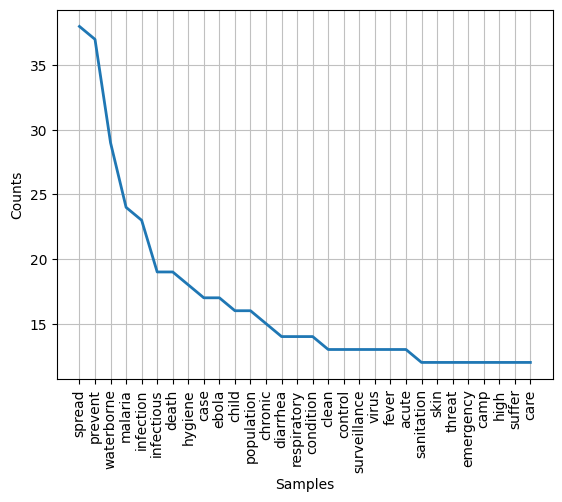

In [330]:
import nltk
import matplotlib.pyplot as plt

text = ' '.join(disease['Topic'])
words = nltk.word_tokenize(text)

fdist = nltk.FreqDist(words)
fdist.plot(30, cumulative=False)
plt.show()


In [331]:
df_train.head(2)

,id,split,message,genre,related,PII,request,offer,aid_related,medical_help,...,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,message_cleaned
0,2,train,Weather update - a cold front from Cuba that c...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,weather update cold front cuba pass
1,7,train,Is the Hurricane over or is it not over,direct,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,


***III. Annotate using machine learning***

In [332]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import re

In [333]:
import torch
from transformers import RobertaTokenizer, RobertaModel
import numpy as np

# Load the RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [334]:
def is_disease_related(text):
    for keyword in disease['Topic']:
        if re.search(keyword, text, re.IGNORECASE):
            return 1
    return 0

In [335]:
df_train['disease_related']=df_train['message_cleaned'].apply(is_disease_related)
df_test['disease_related']=df_test['message_cleaned'].apply(is_disease_related)
df_valid['disease_related']=df_valid['message_cleaned'].apply(is_disease_related)

In [336]:
# Filter the dataframe to only include rows where disaster_released == 1
disease_train = df_train[df_train['disease_related'] == 1]
disease_test = df_test[df_test['disease_related'] == 1]
disease_valid = df_valid[df_valid['disease_related'] == 1]

In [337]:
df_train[df_train['disease_related'] == 0]

,id,split,message,genre,related,PII,request,offer,aid_related,medical_help,...,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,message_cleaned,disease_related


In [338]:
df_train.head(2)

,id,split,message,genre,related,PII,request,offer,aid_related,medical_help,...,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,message_cleaned,disease_related
0,2,train,Weather update - a cold front from Cuba that c...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,weather update cold front cuba pass,1
1,7,train,Is the Hurricane over or is it not over,direct,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,,1


In [339]:
df_test.head(2)

,id,split,message,genre,related,PII,request,offer,aid_related,medical_help,...,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,message_cleaned,disease_related
0,9,test,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,leogane destroy hospital croix function needs ...,1
1,39,test,We are at Gressier we needs assistance right a...,direct,1,0,1,0,1,1,...,1,1,0,0,0,0,0,1,gressier assistance right away asap,1


In [340]:
df_valid.head(2)

,id,split,message,genre,related,PII,request,offer,aid_related,medical_help,...,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,message_cleaned,disease_related
0,8,validation,Looking for someone but no name,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,looking name,1
1,18,validation,I am in Croix-des-Bouquets. We have health iss...,direct,1,0,1,0,1,1,...,0,0,0,0,0,0,0,1,croixdesbouquets issue worker santo croixdesbo...,1


***III. Machine learning***

In [341]:
import sklearn
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer 

# Create an empty array
X = np.array([], dtype=str) 
# Append text from all the splits to the empty array
X = np.append(X, df_train["message_cleaned"]) 
X = np.append(X, df_valid["message_cleaned"])
X = np.append(X, df_test["message_cleaned"])

In [342]:

vectorizer = TfidfVectorizer() # Load the tf-idf vectorizer from sklearn
vectorizer = vectorizer.fit(X) # Fit the vectorizer on the entire data

In [343]:
# Extract the vocabulary from the vectorizer
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 31686


In [344]:
# Display a sample of the word => value mapping
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
weather => 30658
update => 29745
cold => 5045
front => 10259
cuba => 6157


In [345]:
y_train = df_train["disease_related"].to_numpy()
y_val = df_valid["disease_related"].to_numpy()
y_test = df_test["disease_related"].to_numpy()

In [346]:
df_train = df_train.dropna(subset=['message_cleaned'])

In [347]:
df_test = df_test.dropna(subset=['message_cleaned'])
df_valid = df_valid.dropna(subset=['message_cleaned'])

In [348]:
# Transform the text for each data split and store it in a variable
X_train = vectorizer.transform(df_train["message_cleaned"]).toarray()
X_val= vectorizer.transform(df_valid["message_cleaned"]).toarray()
X_test = vectorizer.transform(df_test["message_cleaned"]).toarray()

MemoryError: Unable to allocate 4.97 GiB for an array with shape (21046, 31686) and data type float64

**1. Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 

import matplotlib.pyplot as plt

In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
# Load the model
lr_model = LogisticRegression()

# Fit the model
lr_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = lr_model.predict(X_val)

# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_val, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

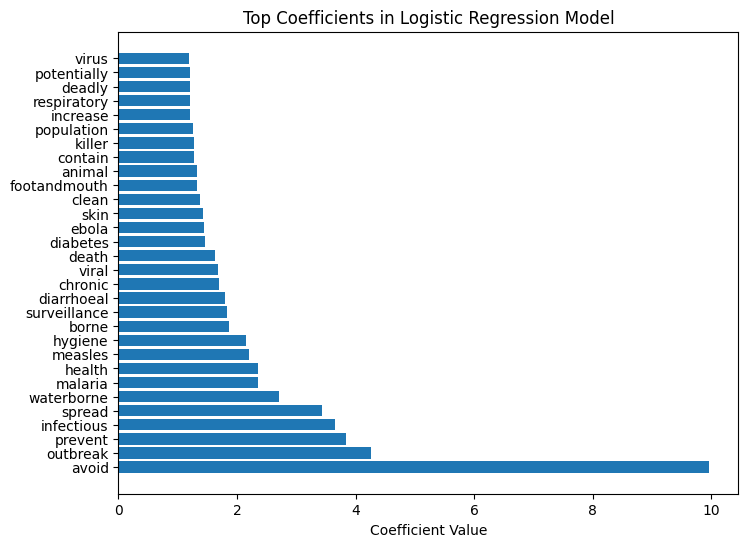

In [ ]:
import matplotlib.pyplot as plt

# Obtain the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Obtain the coefficients of the logistic regression model
coefficients = lr_model.coef_[0]

# Sort the coefficients in descending order
sorted_coefficients = sorted(zip(coefficients, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_coefficients = sorted_coefficients[:k]
top_features = [feature for coef, feature in top_coefficients]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_coefficients])
ax.set_title("Top Coefficients in Logistic Regression Model")
ax.set_xlabel("Coefficient Value")
plt.show()

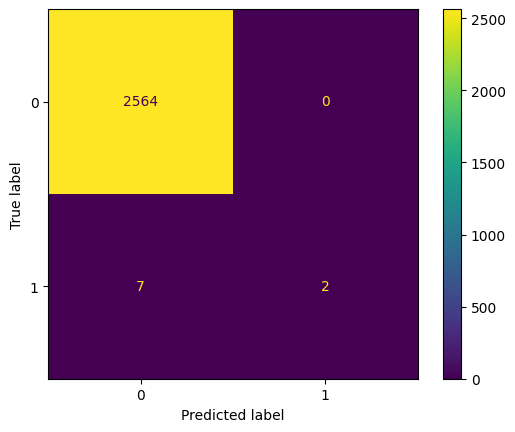

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

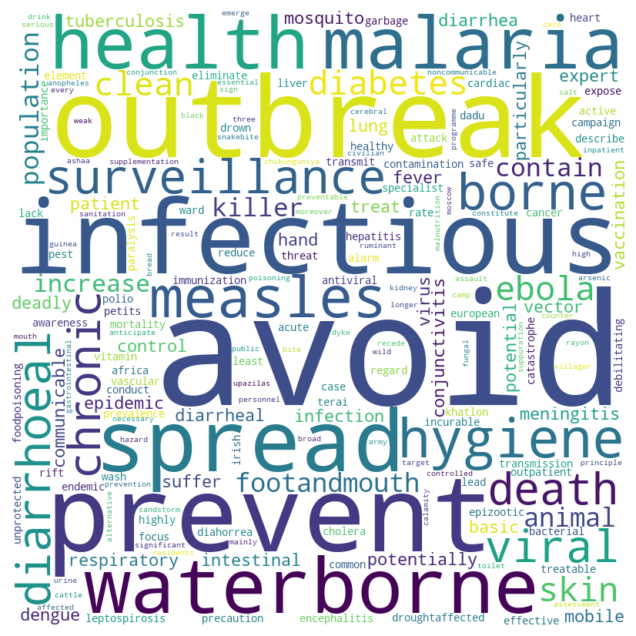

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the coefficients from the logistic regression model
coefficients = lr_model.coef_[0]

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Combine the coefficients and feature names into a dictionary
word_scores = dict(zip(feature_names, coefficients))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color="white").generate_from_frequencies(word_scores)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
def disease_prediction(sample):
    sentences= vectorizer.transform([sample])
    prediction = float(lr_model.predict(sentences))
    # Print the prediction
    if prediction == 1:
        print("The message suggests that there is a disease.")
    else:
        print("The message suggests that there is no disease.")

In [ ]:
sample="Virus animal malaria"
disease_prediction(sample)

The message suggests that there is no disease.


***2. Random Forest***

In [ ]:
from sklearn.model_selection import train_test_split # package training and test data spilt
from sklearn.ensemble import RandomForestClassifier # package for random classifier
from sklearn.pipeline import make_pipeline # package for pipeline

In [ ]:
model = RandomForestClassifier() # assign random classifier (black box) as a prediction model
model.fit(X_train, y_train) # fit the training and test data into the prediction model

RandomForestClassifier()

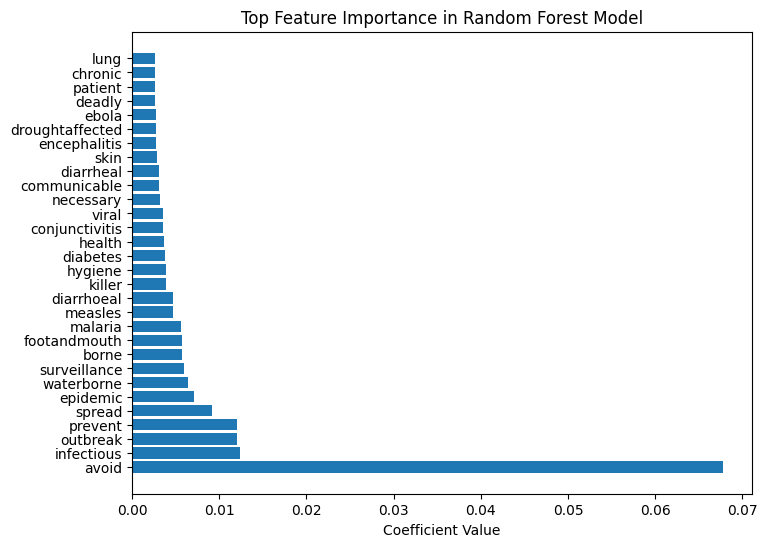

In [ ]:
# Generate feature importance plot
importances = model.feature_importances_
# Sort the coefficients in descending order
sorted_importances= sorted(zip(importances, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in Random Forest Model")
ax.set_xlabel("Coefficient Value")
plt.show()

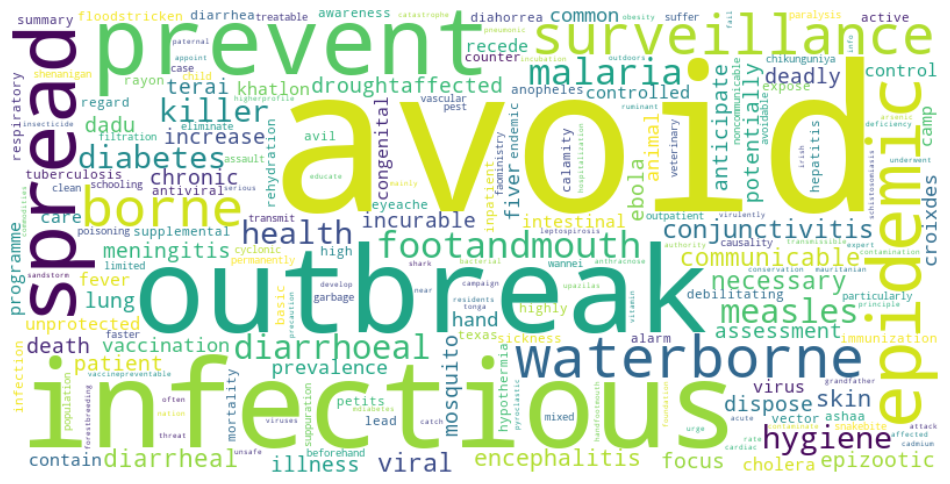

In [ ]:
# Generate feature importance plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = vectorizer.get_feature_names_out()
# Generate a dictionary with words and their importances
word_importances = {}
for i in range(len(indices)):
    word_importances[features[indices[i]]] = importances[indices[i]]

# Create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_importances)

# Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

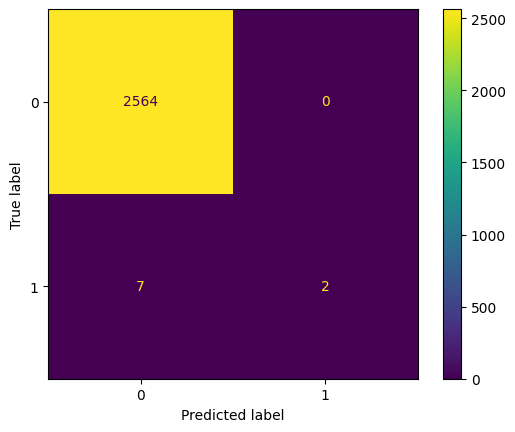

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [ ]:
def disease_prediction_rf(sample):
    sentences= vectorizer.transform([sample])
    prediction = float(model.predict(sentences))
    # Print the prediction
    if prediction == 1:
        print("The message suggests that there is a disease.")
    else:
        print("The message suggests that there is no disease.")

In [ ]:
sample="Virus animal malaria disease"
disease_prediction_rf(sample)

The message suggests that there is no disease.
